In [1]:
using Plots; pythonplot()

Plots.PythonPlotBackend()

# X gate 7 photons

## SNAP & DISP

In [4]:
infidelities_function_of_blocks = [0.46651443231897505 0.17269565656962327 0.04751990062546152 0.0012056685687320545 7.481634554706851e-5]
n_blocks = [1:1:5]
n_gates = [1:10000]

z = []
for idx in 1:1:5
    z_column = []
    for col in 1:1:10000
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=20, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=2, fmt = :PDF )
n_blocks = [1:1:5]
n_gates = [10/(i*1e-3) for i in 1:5]
Labels = "T1 = 10 ms"
plot!(n_blocks, n_gates, label=Labels, marker = :diamond,  linestyle=:dash)
savefig("../../plots/contour_plots/7_photons_3X_contourplot_snapdisp.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/contour_plots/7_photons_3X_contourplot_snapdisp.pdf"

## ECD

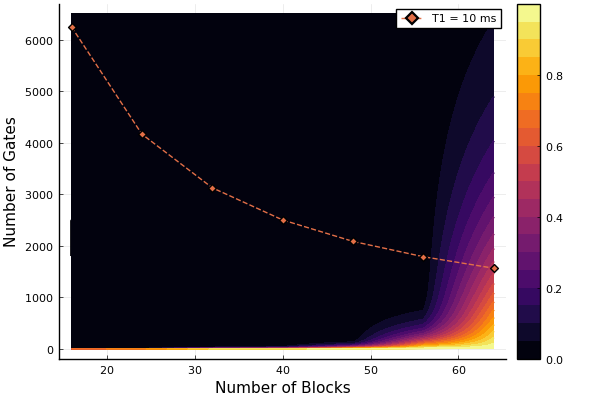

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [11]:
infidelities_function_of_blocks = [0.3391703408144481 0.2591006006269245 0.08994959727658447 0.06433382006020827 0.022273102536182976 0.004010219481816346 0.0004694727918465036]
n_blocks = [16:8:64]
n_gates = [1:6500]

z = []
for idx in 1:1:7
    z_column = []
    for col in 1:1:6500
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=20, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=2, fmt = :PDF )
n_blocks = [16:8:64]
n_gates = [10/(i*1e-4) for i in 16:8:64]
Labels = "T1 = 10 ms"
plot!(n_blocks, n_gates, label=Labels, marker = :diamond,  linestyle=:dash)
#savefig("../../plots/contour_plots/7_photons_3X_contourplot_ECD.pdf")

In [13]:
infidelities_function_of_blocks = [0.3391703408144481 0.2591006006269245 0.08994959727658447 0.06433382006020827 0.022273102536182976 0.004010219481816346 0.0004694727918465036]
n_blocks = [16:8:64]
n_gates = [1:1000]

z = []
for idx in 1:1:7
    z_column = []
    for col in 1:1:1000
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=20, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=2, fmt = :PDF )
savefig("../../plots/contour_plots/7_photons_3X_contourplot_ECD_zoommed.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/contour_plots/7_photons_3X_contourplot_ECD_zoommed.pdf"

# Rx gate

## SNAP & DISP

In [15]:
infidelities_function_of_blocks = [0.01266411851628968 0.000674335700608486 1.6353383580636205e-7]
n_blocks = [1:1:3]
n_gates = [1:10000]

z = []
for idx in 1:1:3
    z_column = []
    for col in 1:1:10000
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=20, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=4,  fmt = :PDF )
n_blocks = [1:1:3]
n_gates = [10/(i*1e-3) for i in 1:1:3]
Labels = "T1 = 10 ms"
plot!(n_blocks, n_gates, label=Labels, marker = :diamond, linestyle=:dash)
savefig("../../plots/contour_plots/7_photons_RX_contourplot_snapdisp.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/contour_plots/7_photons_RX_contourplot_snapdisp.pdf"

In [18]:
infidelities_function_of_blocks = [0.23649875526287378
0.019476397847247195
0.01550474423346715
0.007249857488059286
0.0068289395961939787
0.006528730476273337]
n_blocks = [8:8:48]
n_gates = [1:12500]

z = []
for idx in 1:1:6
    z_column = []
    for col in 1:1:12500
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=20, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=2 , fmt = :PDF)
n_blocks = [8:8:48]
n_gates = [10/(i*1e-4) for i in 8:8:48]
Labels = "T1 = 30 ms"
plot!(n_blocks, n_gates, label=Labels, marker = :diamond,  linestyle=:dash)
savefig("../../plots/contour_plots/7_photons_RX_contourplot_ECD.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/contour_plots/7_photons_RX_contourplot_ECD.pdf"

In [21]:
infidelities_function_of_blocks = [0.23649875526287378
0.019476397847247195
0.01550474423346715
0.007249857488059286
0.0068289395961939787
0.006528730476273337]
n_blocks = [8:8:48]
n_gates = [1:500]

z = []
for idx in 1:1:6
    z_column = []
    for col in 1:1:500
        z_i_col = (1-infidelities_function_of_blocks[idx])^col
        push!(z_column,z_i_col)
    end
    push!(z,z_column)
end

z_matrix = hcat(z...)
contour(n_blocks, n_gates, z_matrix, levels=10, fill=true, cbar=true, clabels=false,xlabel="Number of Blocks", ylabel="Number of Gates", zlabel="Infidelity",lw=2, fmt = :PDF )
savefig("../../plots/contour_plots/7_photons_RX_contourplot_ECD_zoommed.pdf")

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/contour_plots/7_photons_RX_contourplot_ECD_zoommed.pdf"